<br/>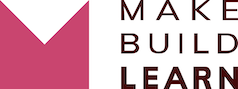<br/><br/>
<center style="color:#888">Visualización de datos</center>
<center style="color:#aaa; margin-top:10px;"><b>Prof. Óscar Fernández Angulo</b><br>oscarfa@faculty.mioti.es</center>
<p style="font-size: 2.5em; text-align:center">Challenge S2: Vinos y Supermercados</p><br/>

# Consideraciones previas

* Cada ejercicio se responderá con una sola figura y, si se considera necesario, un texto comentando los resultados.
* No existe una única respuesta correcta. 
* Se valorará positivamente usar diferentes tipos de gráficos durante el Challenge. Si no se repite ninguno, mejor.
* Los ejercicios están pensados para responderse con los conocimientos obtenidos en cualquiera de los Worksheets presentados hasta la fecha.


In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime
import math

matplotlib.rcParams.update({'font.size': 14})


# Primera parte: Vinos

En esta primera parte, trabajaremos con el dataset [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews). En éste, tenemos la información de un gran número de vinos como el nombre, el país de procedencia, el precio o la puntuación. Toda esta información ha sido scrapeada de la página [wine enthusiast](https://www.winemag.com/).

Con este dataset y la ayuda de nuestros gráficos extraeremos cierta información de interes.

In [2]:
wine_df = pd.read_csv("./winemag-data-130k-v2.csv")
wine_df.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
100074,100074,France,"This is warm and round, with red fruit flavors...",Réserve,87,19.0,Burgundy,Bourgogne,NaN,Roger Voss,@vossroger,Nuiton-Beaunoy 2010 Réserve (Bourgogne),Pinot Noir,Nuiton-Beaunoy
54867,54867,US,This vintage marks a welcome return of Viognie...,Cailloux Vineyard,94,65.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2011 Cailloux Vineyard Viognier (Walla ...,Viognier,Cayuse
1405,1405,US,This is an unusual commingling of mostly Rhone...,The Tower,88,22.0,California,Dry Creek Valley,Sonoma,Virginie Boone,@vboone,Martin Ray 2014 The Tower White (Dry Creek Val...,White Blend,Martin Ray
9735,9735,Italy,This 100% Lagrein opens with aromas of ripe da...,NaN,89,20.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Abbazia di Novacella 2015 Lagrein (Alto Adige),Lagrein,Abbazia di Novacella
16780,16780,Germany,"There's a minerally, earthy tone from nose to ...",Bernkasteler Kurfürstlay Auslese,89,16.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Leonard Kreusch 2012 Bernkasteler Kurfürstlay ...,Riesling,Leonard Kreusch


## Ejercicio 1

Para comenzar, queremos conocer cuales son las regiones (columna *region_1*) más caras. Además, queremos mostrar a qué país pertenece cada una de estas regiones.

In [3]:
def plot_wine_regions_2(color_scale):

    #Preparamos los datos. Seleccionamos los campos country, region_1 y price, los ordenamos por precio y borramos na
    wine_df_subset_1 = wine_df.loc[:, ['country', 'region_1', 'price']].sort_values(
        by='price', ascending=False).dropna()
    
    # Agrupamos por pais y región para calcular el precio medio por región y rompemos indice para que nos quede un registro
    # por pais, región y precio medio de la región
    wine_df_subset_1 = wine_df_subset_1.groupby(['country', 'region_1'])[
        'price'].agg('mean').sort_values(ascending=False).reset_index()
    
    # Seleccinamos los 30 primeros
    wine_df_subset_1 = wine_df_subset_1[:30].sort_values(by='price', ascending=True)
    
    # Generamos los diccionarios que mapean paises con colores y la leyenda con este mapeo.
    country_color_map = dict()
    highlight_country_color_map = dict()
    legend_entries = list()

    for i, country in enumerate(wine_df_subset_1['country'].unique()):

        color = color_scale[i]
        country_color_map[country] = color

        legend_entry = mpatches.Patch(color=color, label=country)
        legend_entries.append(legend_entry)

    # Obtenemos las columnas a representar.
    regions = wine_df_subset_1['region_1']
    prices = wine_df_subset_1['price']

    
    # Calculamos los colores que le corresponde a cada línea.
    countries = wine_df_subset_1['country']

    countries_colors = [country_color_map[country]
                        for country, region in zip(countries, regions)]

    # Instanciamos la figura.
    fig, ax = plt.subplots(figsize=(14, 10))

    # Añadimos unas guías verticales.
    ax.grid(True, axis='x')

    # Representamos las líneas.

    ax.barh(regions, prices, color=countries_colors)

    # Añadimos la leyenda.
    ax.legend(handles=legend_entries,loc='center', bbox_to_anchor=(1, 0.5))

    # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

#     # Etiquetamos el eje X.
    ax.set_xlabel('Precio por botella')
   

    return fig, ax

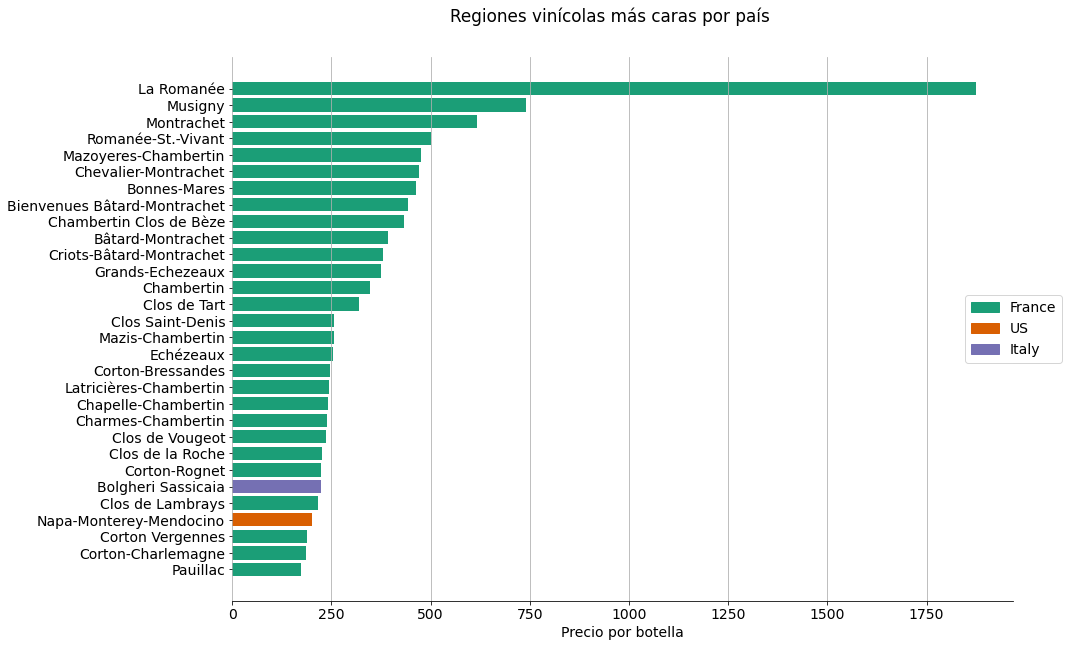

In [4]:
fig, ax = plot_wine_regions_2(plt.get_cmap('Dark2').colors)
fig.suptitle('Regiones vinícolas más caras por país', y=.95);

## Ejercicio 2

En este segundo ejercicio, nos gustaría saber, dentro de España, cuales son las regiones mejor valoradas. Además, nos gustaría destacar la comparativa entre las dos denominaciones de origen de tinto más conocidas: Rioja y Ribera de Duero.

Text(0.5, 0.92, 'Regiones vinícolas españolas con mayor puntuación')

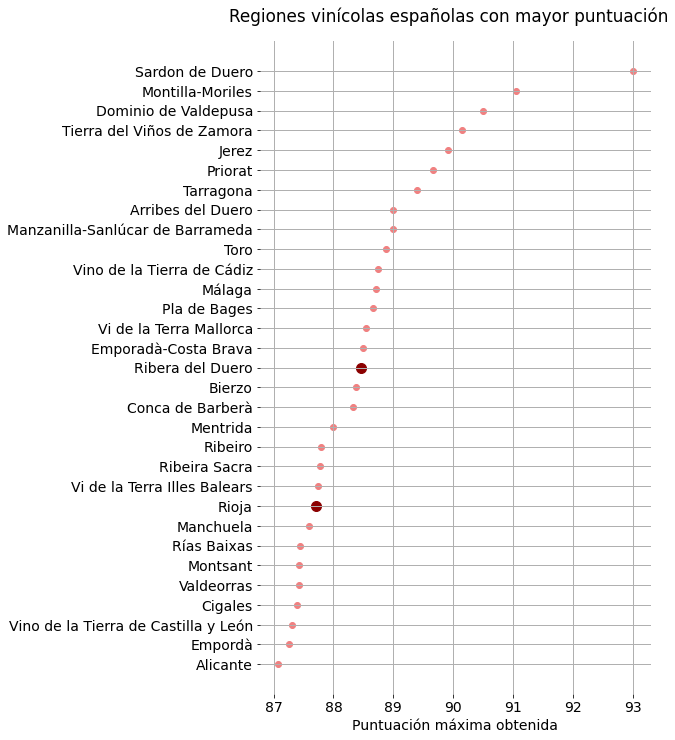

In [5]:
# Obtenemos las regiones vinícolas españolas y las ordenamos ascendentemente de menor a mayor puntuación
wine_df_subset_2 = wine_df[wine_df['country'] == 'Spain'].loc[:, [
    'country', 'region_1', 'points']].sort_values(by='points', ascending=False).dropna()

# Como criterio uilizamos la media de la puntuación de todos las bodegas de esa región.

wine_df_subset_2 = wine_df_subset_2.groupby('region_1')['points'].aggregate(
    'mean').sort_values(ascending=False).reset_index()

# Seleccionamos las 30 primeras.
wine_df_subset_2 = wine_df_subset_2.loc[:30].sort_values('points')

regions = wine_df_subset_2['region_1']
points = wine_df_subset_2['points']

#Identificamos a Ribera del Duero y Rioja para hacerles el tratamiento especial de color y significación.
points_Ribera = wine_df_subset_2[wine_df_subset_2['region_1']
                                 == 'Ribera del Duero'].loc[:, 'points']
points_Rioja = wine_df_subset_2[wine_df_subset_2['region_1']
                                == 'Rioja'].loc[:, 'points']


# Instanciamos la figura.
fig, ax = plt.subplots(figsize=(7, 12))

# Representamos estos valores.
ax.scatter(points, regions, color='lightcoral')

ax.scatter(points_Ribera, ['Ribera del Duero'], color='darkred', s=100)
ax.scatter(points_Rioja, ['Rioja'], color='darkred', s=100)

# Representamos la cuadrícula vertical.
ax.grid(mfcalt='red', linewidth=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Etiquetamos la figura.
ax.set_xlabel('Puntuación máxima obtenida')

fig.suptitle('Regiones vinícolas españolas con mayor puntuación', y=.92)

# Segunda parte: Supermercados

Para la segunda parte del Challenge cambiaremos al dataset [Supermarket sales](https://www.kaggle.com/aungpyaeap/supermarket-sales). Éste contiene la información de las ventas que se produjeron entre Enero y Marzo de 2019 en un supermercado anónimo. Encontramos categorías como la línea de producto de la compra o el género del comprador.

In [6]:
# Cargamos el csv en pandas.
supermarket_sales_df = pd.read_csv("./supermarket_sales.csv")

# Visualizamos las información de las columnas.
supermarket_sales_df.info()

# Casteamos la columna 'Date' a datetime.
supermarket_sales_df['Date'] = pd.to_datetime(supermarket_sales_df['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Ejercicio 3

Para tener una primera visión de los datos, nos gustaría conocer la venta bruta producida cada mes y la aportación de cada ciudad a esta cifra.

In [7]:
# Cada línea es una compra de un producto.
supermarket_sales_df_pivot = pd.pivot_table(supermarket_sales_df, values='Total', index=['Date'],
                     columns=['City'],aggfunc='sum')
# Agrupamos por mes y hacemos suma de las ventas por mes y ciudad
supermarket_sales_df_pivot=supermarket_sales_df_pivot.resample('M').sum()
supermarket_sales_df_pivot


City,Mandalay,Naypyitaw,Yangon
Date,,,
2019-01-31,37176.0585,40434.6810,38681.1285
2019-02-28,34424.2710,32934.9825,29860.1205
2019-03-31,34597.3425,37199.0430,37659.1215


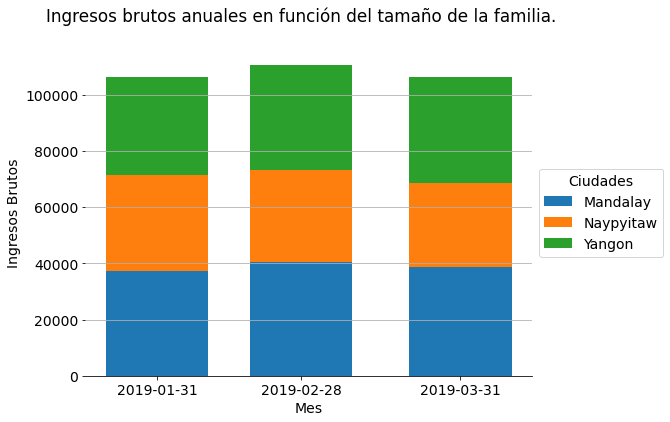

In [8]:
# Pasamos a configurar el gráfico.

# Obtenemos las etiquetas del eje X.
x_labels = supermarket_sales_df_pivot.index
# Instanciamos el valor de cada color.

color_labels = supermarket_sales_df_pivot.columns

# Instanciamos la figura.
fig, ax = plt.subplots(figsize=(8, 6))

# Instanciamos un array con los valores del inicio de cada barra.
bottom_values = np.zeros(supermarket_sales_df_pivot.shape[1])

# Iteramos la tabla pivotada representamos los valores.
for row, color_label in zip(supermarket_sales_df_pivot.values, color_labels):
    # Representamos un piso de las barras.
    ax.bar(x_labels,row, width=20, bottom=bottom_values, label=color_label)
    # Actualizamos el inicio de las próximas barras.
    bottom_values += row
    
# Etiquetamos la figura.
fig.suptitle('Ingresos brutos anuales en función del tamaño de la familia.')

ax.set_xticks(list(supermarket_sales_df_pivot.index))
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos Brutos')

# Mostramos la cuadricula.
ax.grid(True, axis='y')

# Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
  
    
# Mostramos la leyenda.
ax.legend(title="Ciudades", loc='center left', bbox_to_anchor=(1, 0.5))

## Ejercicio 4

Un dato muy interesante de este dataset es el campo 'Product line', éste categoriza los productos en seis grupos: Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, Fashion accessories.

Para conocer la forma que tienen de comprar los clientes de estos supermercados, nos gustaría visualizar cuánto se han gastado los hombres y las mujeres en cada una de estas categorías.

In [9]:
# Preparamos los datos antes de pintar.
# Generamos una pivot en el que el indice es cada linea de productos, las columnas el género y 
# los valores la suma del total

supermarket_sales_df_pivot = pd.pivot_table(supermarket_sales_df, values='Total', index=['Product line'],
                      columns=['Gender'],aggfunc='sum')
supermarket_sales_df_pivot

Gender,Female,Male
Product line,,
Electronic accessories,27102.0225,27235.5090
Fashion accessories,30437.4000,23868.4950
Food and beverages,33170.9175,22973.9265
Health and beauty,18560.9865,30632.7525
Home and lifestyle,30036.8775,23825.0355
Sports and travel,28574.7210,26548.1055


In [21]:
def grouped_bar_plot(
    df, amount_key, group_key, color_key, width=0.35, title=None, amount_title=None, group_title=None,
    color_title=None, rotate_x_labels=False, aggfunc='mean',palette='Blues', alternate_xlabel=None
):
    assert aggfunc in ('mean', 'sum')
    
    #Calculamos la escala de colores 
    
    color_scale = plt.get_cmap(palette)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Ordenamos el DataFrame por la clave del grupo y del color.
    df = df.sort_values([group_key, color_key])

    # Obtenemos las etiquetas de los grupos si tenemos etiqueas alternativas.
    if alternate_xlabel:
        group_labels = df[alternate_xlabel].unique()
    else:
        group_labels = df[group_key].unique()
    
    # Calculamos el número de grupos.
    number_of_groups = group_labels.shape[0]
    
    # Calculamos el número de barras por grupo.
    number_of_bars_per_group = df[color_key].unique().shape[0]
    
    # Agrupamos el DataFrame de tal forma que solo haya un valor por cada par grupo-color.
    df = df.groupby([color_key, group_key])
    
    if aggfunc == 'mean':
        df = df.mean()
    elif aggfunc == 'sum':
        df = df.sum()
    
    # Calculamos la distancia entre los grupos.
    distance = width * (number_of_bars_per_group + 1)
    
    # Calculamos la posición de cada grupo en el eje X.
    group_x_possition = np.linspace(1, distance * number_of_groups, number_of_groups)
    
      
    # Creamos un DataFrame por cada color para iterarlo.
    df = df.groupby(color_key)
    
    # Iteramos los grupos y, en cada iteración, representamos todas las barras de un mismo color.
    for i, df_subset in enumerate(df):
        # Calculamos la posición relativa de la barra con respecto al grupo.
        
        relative_position = ((1 - number_of_bars_per_group)/2 + i) * width
        
        # Representamos las barras de un mismo color.
        ax.bar(
            group_x_possition + relative_position,
            df_subset[1][amount_key],
            width=width,
            color=color_scale((i+1)/number_of_bars_per_group),
            label=df_subset[1].index[0][0]
        )
    
    # Añadimos la leyenda.    
    ax.legend(bbox_to_anchor=(1.05, 1), title=color_title)

    # Etiquetamos la figura.
    fig.suptitle(title)

    ax.set_xticks(group_x_possition)
    if rotate_x_labels:
        ax.set_xticklabels(group_labels, rotation=30, ha='right')
    else:
        ax.set_xticklabels(group_labels)
        
    ax.set_ylabel(amount_title)
    ax.set_xlabel(group_title)

    # Mostramos la cuadricula.
    ax.grid(True, axis='y')

    # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
        
    return fig, ax

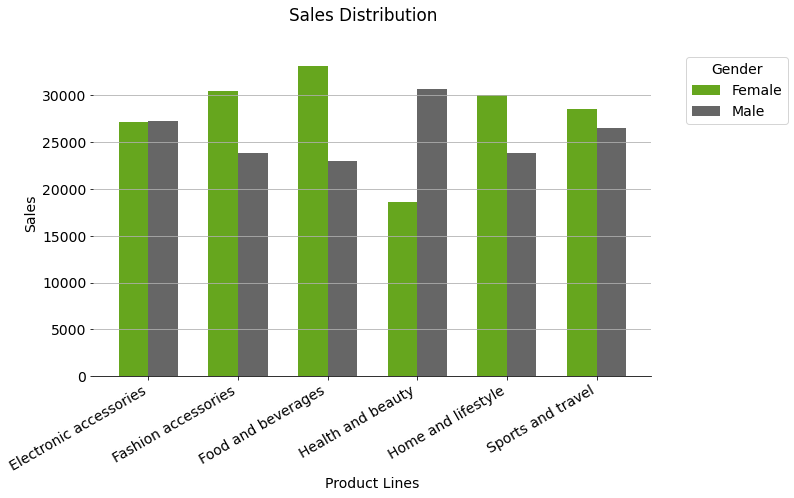

In [22]:
fig, ax = grouped_bar_plot(
    supermarket_sales_df,
    amount_key='Total',
    color_key='Gender',
    group_key='Product line',
    title='Sales Distribution',
    amount_title='Sales',
    color_title='Gender',
    group_title='Product Lines',
    rotate_x_labels=True,
    aggfunc='sum',
    palette='Dark2'
)

## Ejercicio 5

Por úlltimo, nos gustar saber cuánto se vende cada día de la semana, de media, de cada línea de producto.

In [12]:
# Sacamos los datos.
supermarket_sales_df_subset=supermarket_sales_df.loc[:,['Date','Product line','Total']].sort_values('Date')

#Obtenemos el número correspondinte a cada día de la semana. Nos viene bien de cara a ordenar.
supermarket_sales_df_subset['Number Day of week']=supermarket_sales_df['Date'].dt.dayofweek.sort_values()

# Creamos una tabla pivotada
supermarket_sales_df_subset = pd.pivot_table(
    supermarket_sales_df_subset, values='Total', columns=['Product line'], index=['Number Day of week'], aggfunc='mean')
supermarket_sales_df_subset

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Number Day of week,,,,,,
0,257.483739,356.640083,300.555818,324.932192,304.767225,275.101313
1,348.652500,285.510750,378.780635,295.158259,350.396932,301.208654
2,270.272917,243.563625,339.045000,309.934026,340.779711,326.707500
3,345.421125,367.899500,339.929625,293.814316,285.647526,320.862196
4,285.185559,318.491950,239.917263,320.423654,286.475875,424.285370
5,360.902889,307.969200,302.432177,390.018079,383.666937,342.991500
6,320.593875,279.187125,337.539848,355.238250,377.259094,318.884563


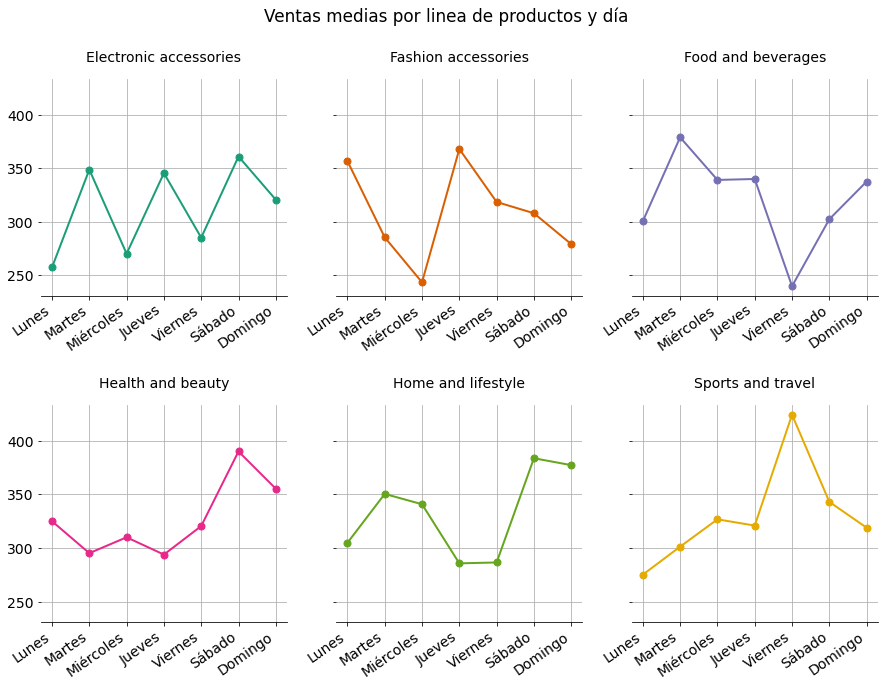

In [14]:
# Función que montará un panel de 6 gráficas, una por línea de productos.
# En el eje Y irán las ventas y en el eje X los días de la semana.

def sales_per_day_of_week():

    days = np.array(['Lunes', 'Martes', 'Miércoles',
                     'Jueves', 'Viernes', 'Sábado', 'Domingo'])
    product_lines = supermarket_sales_df_subset.columns.values
    
    color_scale = plt.get_cmap('Dark2')

    fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=True)
    
    for i in range(0, 2):
        for j in range(0, 3):
            indexed_ax = ax[i][j]
            indexed_ax.plot(
                days, supermarket_sales_df_subset[product_lines[i*3 + j]], color=color_scale(i*3 + j), marker='o', linewidth=2, markersize=7)
            indexed_ax.set_xticks(days)
            indexed_ax.set_xticklabels(days, rotation=35, ha='right')
            indexed_ax.grid(True)
            # Eliminamos el marco.
            indexed_ax.spines['top'].set_visible(False)
            indexed_ax.spines['right'].set_visible(False)
            # indexed_ax.spines['bottom'].set_visible(False)
            indexed_ax.spines['left'].set_visible(False)
            # Añadimos el título al panel.
            indexed_ax.set_title(product_lines[i*3 + j], fontdict={'size': 14}, y=1.05)

    # Etiquetamos la figura.
    fig.suptitle('Ventas medias por linea de productos y día')
    fig.subplots_adjust(hspace=0.5)

    return fig, ax

fig, ax = sales_per_day_of_week()